In [1]:
# this notebook explores some of the data from worldwide COVID-19 infections from the Kaggle Forecasting Challenge

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# read the data
data = pd.read_csv('../data/train.csv')

<h2> Exploration and Visualization

In [4]:
data.head()

Id Province/State Country/Region   Lat  Long        Date  ConfirmedCases  \
0   1            NaN    Afghanistan  33.0  65.0  2020-01-22             0.0   
1   2            NaN    Afghanistan  33.0  65.0  2020-01-23             0.0   
2   3            NaN    Afghanistan  33.0  65.0  2020-01-24             0.0   
3   4            NaN    Afghanistan  33.0  65.0  2020-01-25             0.0   
4   5            NaN    Afghanistan  33.0  65.0  2020-01-26             0.0   

   Fatalities  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [5]:
data.shape

(17892, 8)

In [6]:
data.columns

Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')

In [7]:
# check for missing values
for col in data.columns:
    n_missing = data[col].isnull().sum()
    if(n_missing):
        print(col, n_missing)

Province/State 9702


In [8]:
# get the final timestep date to identify the rows corresponding to the final time step for each country
final_date = data.Date.unique()[-1]
final_date

'2020-03-24'

In [9]:
# get the amount of infections for the final timestep
infections_per_country = data[data.Date == final_date][['Province/State', 'Country/Region', 'ConfirmedCases']]
# sum over province/state
infections_per_country = infections_per_country.groupby(['Country/Region']).sum()
infections_per_country

ConfirmedCases
Country/Region                     
Afghanistan                    74.0
Albania                       123.0
Algeria                       264.0
Andorra                       164.0
Antigua and Barbuda             3.0
...                             ...
Uruguay                       162.0
Uzbekistan                     50.0
Venezuela                      84.0
Vietnam                       134.0
Zambia                          3.0

[163 rows x 1 columns]

In [10]:
# check if the above computation is correct
infections_per_country[infections_per_country.index == 'Netherlands']

ConfirmedCases
Country/Region                
Netherlands             5578.0

In [11]:
# add index (country) as column
infections_per_country = infections_per_country.reset_index()
infections_per_country = infections_per_country.rename(columns={"Country/Region":"country", 
                                                                "ConfirmedCases": "infections"})

In [12]:
# plot the infections per country
fig = px.choropleth(infections_per_country,
                    locations=infections_per_country['country'],
                    locationmode='country names',
                    color="infections",
                    hover_name="country", 
                    color_continuous_scale = 'rainbow'
                    )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(title_text="Total confirmed COVID-19 infections per country")

fig.show() 

In [13]:
# remove China
infections_per_country = infections_per_country.loc[infections_per_country['country'] != "China"]

In [14]:
# plot the infections per country, without China
fig = px.choropleth(infections_per_country,
                    locations=infections_per_country['country'],
                    locationmode='country names',
                    color="infections",
                    hover_name="country", 
                    color_continuous_scale = 'rainbow'
                    )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(title_text="Total confirmed COVID-19 infections per country, excluding China")

fig.show()

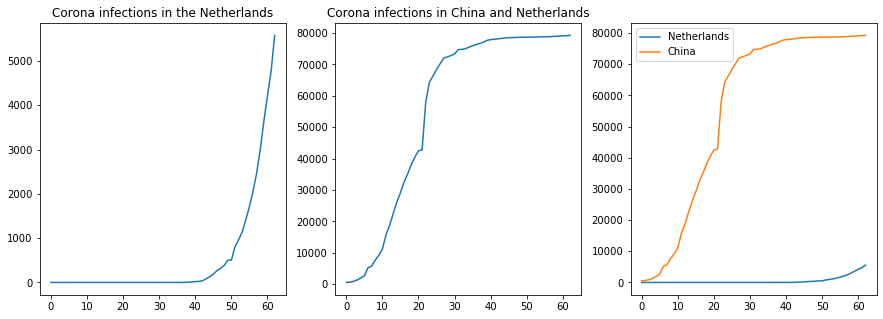

In [15]:
# plot the development of infections for Netherlands and China (aggregated over provinces/states) 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15,5)
ax1.set_title('Corona infections in the Netherlands')
ax2.set_title('Corona infections in China')
ax2.set_title('Corona infections in China and Netherlands')

#ax1.set_xticks([0, data.shape[1] - 5])
#ax2.set_xticks([0, data.shape[1] - 5])
#ax3.set_xticks([0, data.shape[1] - 5])

data[data['Country/Region'] == "Netherlands"].groupby('Date').sum()['ConfirmedCases'].reset_index(drop=True).plot(ax=ax1)
data[data['Country/Region'] == "China"].groupby('Date').sum()['ConfirmedCases'].reset_index(drop=True).plot(ax=ax2)

data[data['Country/Region'] == "Netherlands"].groupby('Date').sum()['ConfirmedCases'].reset_index(drop=True).plot(ax=ax3)
data[data['Country/Region'] == "China"].groupby('Date').sum()['ConfirmedCases'].reset_index(drop=True).plot(ax=ax3)

ax3.legend(['Netherlands', 'China'])